In [1]:
# Install Kaggle package
!pip install kaggle

In [2]:
# Upload Kaggle API key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahmoudsaadmahmoud","key":"e6c887dee2b9ed3147d0c25b481b9545"}'}

In [3]:
# Set up Kaggle directory
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Download the dataset
!kaggle competitions download -c digit-recognizer

 39% 6.00M/15.3M [00:00<00:00, 59.8MB/s]
100% 15.3M/15.3M [00:00<00:00, 94.1MB/s]


In [5]:
# Unzip the dataset
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.callbacks import Callback

In [8]:
# load data
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [40]:
y_train = train.iloc[:,:1]
x_train = train.iloc[:,1:]
x_test = test
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (42000, 784)
y_train shape:  (42000,)
x_test shape:  (28000, 784)


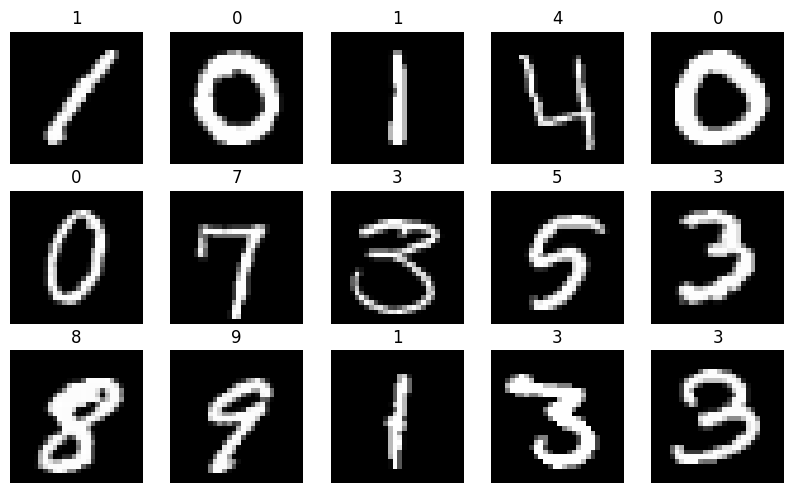

In [10]:
# display the some images
plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train.iloc[i, 1:].values.reshape(28, 28), cmap="gray")
    plt.title(train.iloc[i, 0])
    plt.axis("off")

In [12]:
# Explore the data
print(f"We have {len(train)} images in the training set and {len(test)} images in the test set.")
print(f"The images are {28} x {28} pixels and have {x_train.shape[1]} features.")
print("Unique labels:", y_train['label'].unique())
print("Number of unique labels:", y_train['label'].nunique())

We have 42000 images in the training set and 28000 images in the test set.
The images are 28 x 28 pixels and have 784 features.
Unique labels: [1 0 4 7 3 5 8 9 2 6]
Number of unique labels: 10


In [13]:
# reshape the data
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_test = x_test.values.reshape(-1, 28, 28, 1)


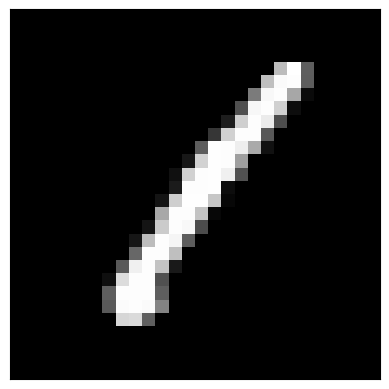

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 188 255  94   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 250 253  93   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 123 248 253 167  10   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80 247 253 208  13   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  29 207 253 235  7

<ipython-input-14-aa6306df783d>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("{:3}".format(int(pixel)), end=" ")


In [14]:
# Display the first image in the dataset as a data matrix
plt.imshow(x_train[0], cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

# Display the values of each pixel in the image
print("Pixel values:")
for row in x_train[0]:
    for pixel in row:
        print("{:3}".format(int(pixel)), end=" ")
    print()

In [15]:
# normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [16]:
# After normalizing the data, the pixel values are now between 0 and 1
print("Pixel values:")
for row in x_train[0]:
    for pixel in row:
        print("{:.2f}".format(float(pixel)), end=" ")
    print()


Pixel values:
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.74 1.00 0.37 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.75 0.98 0.99 0.36 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.48 0.97 0.99 0.65 0.04 0.00 0.00 0.00 0.00 0.00 

<ipython-input-16-511dd3d27d42>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("{:.2f}".format(float(pixel)), end=" ")


 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 


In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [29]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                 

In [31]:
# Define custom callback to stop training when accuracy reaches 99%
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.99:
            print("\nReached 99% accuracy, stopping training.")
            self.model.stop_training = True

In [32]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[MyCallback()])

Epoch 1/20
1050/1050 [==============================] - 12s 8ms/step - loss: 0.7538 - accuracy: 0.7326 - val_loss: 0.1007 - val_accuracy: 0.9723
Epoch 2/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.1241 - accuracy: 0.9702 - val_loss: 0.0817 - val_accuracy: 0.9787
Epoch 3/20
1050/1050 [==============================] - 8s 8ms/step - loss: 0.1062 - accuracy: 0.9742 - val_loss: 0.0694 - val_accuracy: 0.9820
Epoch 4/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0879 - accuracy: 0.9804 - val_loss: 0.0657 - val_accuracy: 0.9856
Epoch 5/20
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0795 - accuracy: 0.9812 - val_loss: 0.0536 - val_accuracy: 0.9875
Epoch 6/20
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0758 - accuracy: 0.9828 - val_loss: 0.0512 - val_accuracy: 0.9877
Epoch 7/20
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0705 - accuracy: 0.9839 - val_loss: 0.0446 - val_accuracy

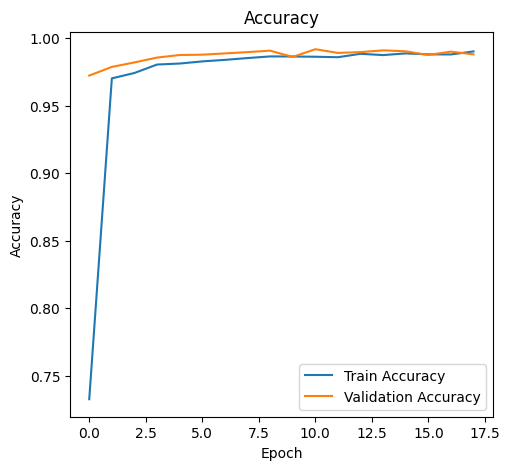

In [33]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

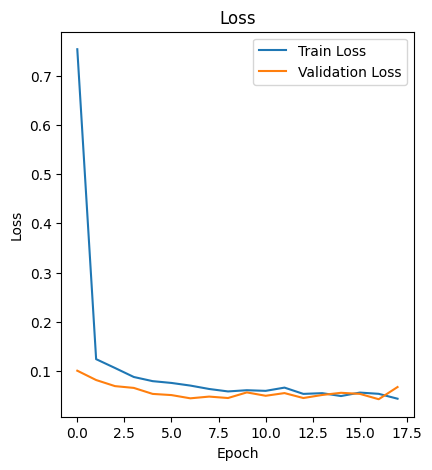

In [34]:
# model loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss")
plt.show()

875/875 [==============================] - 2s 3ms/step


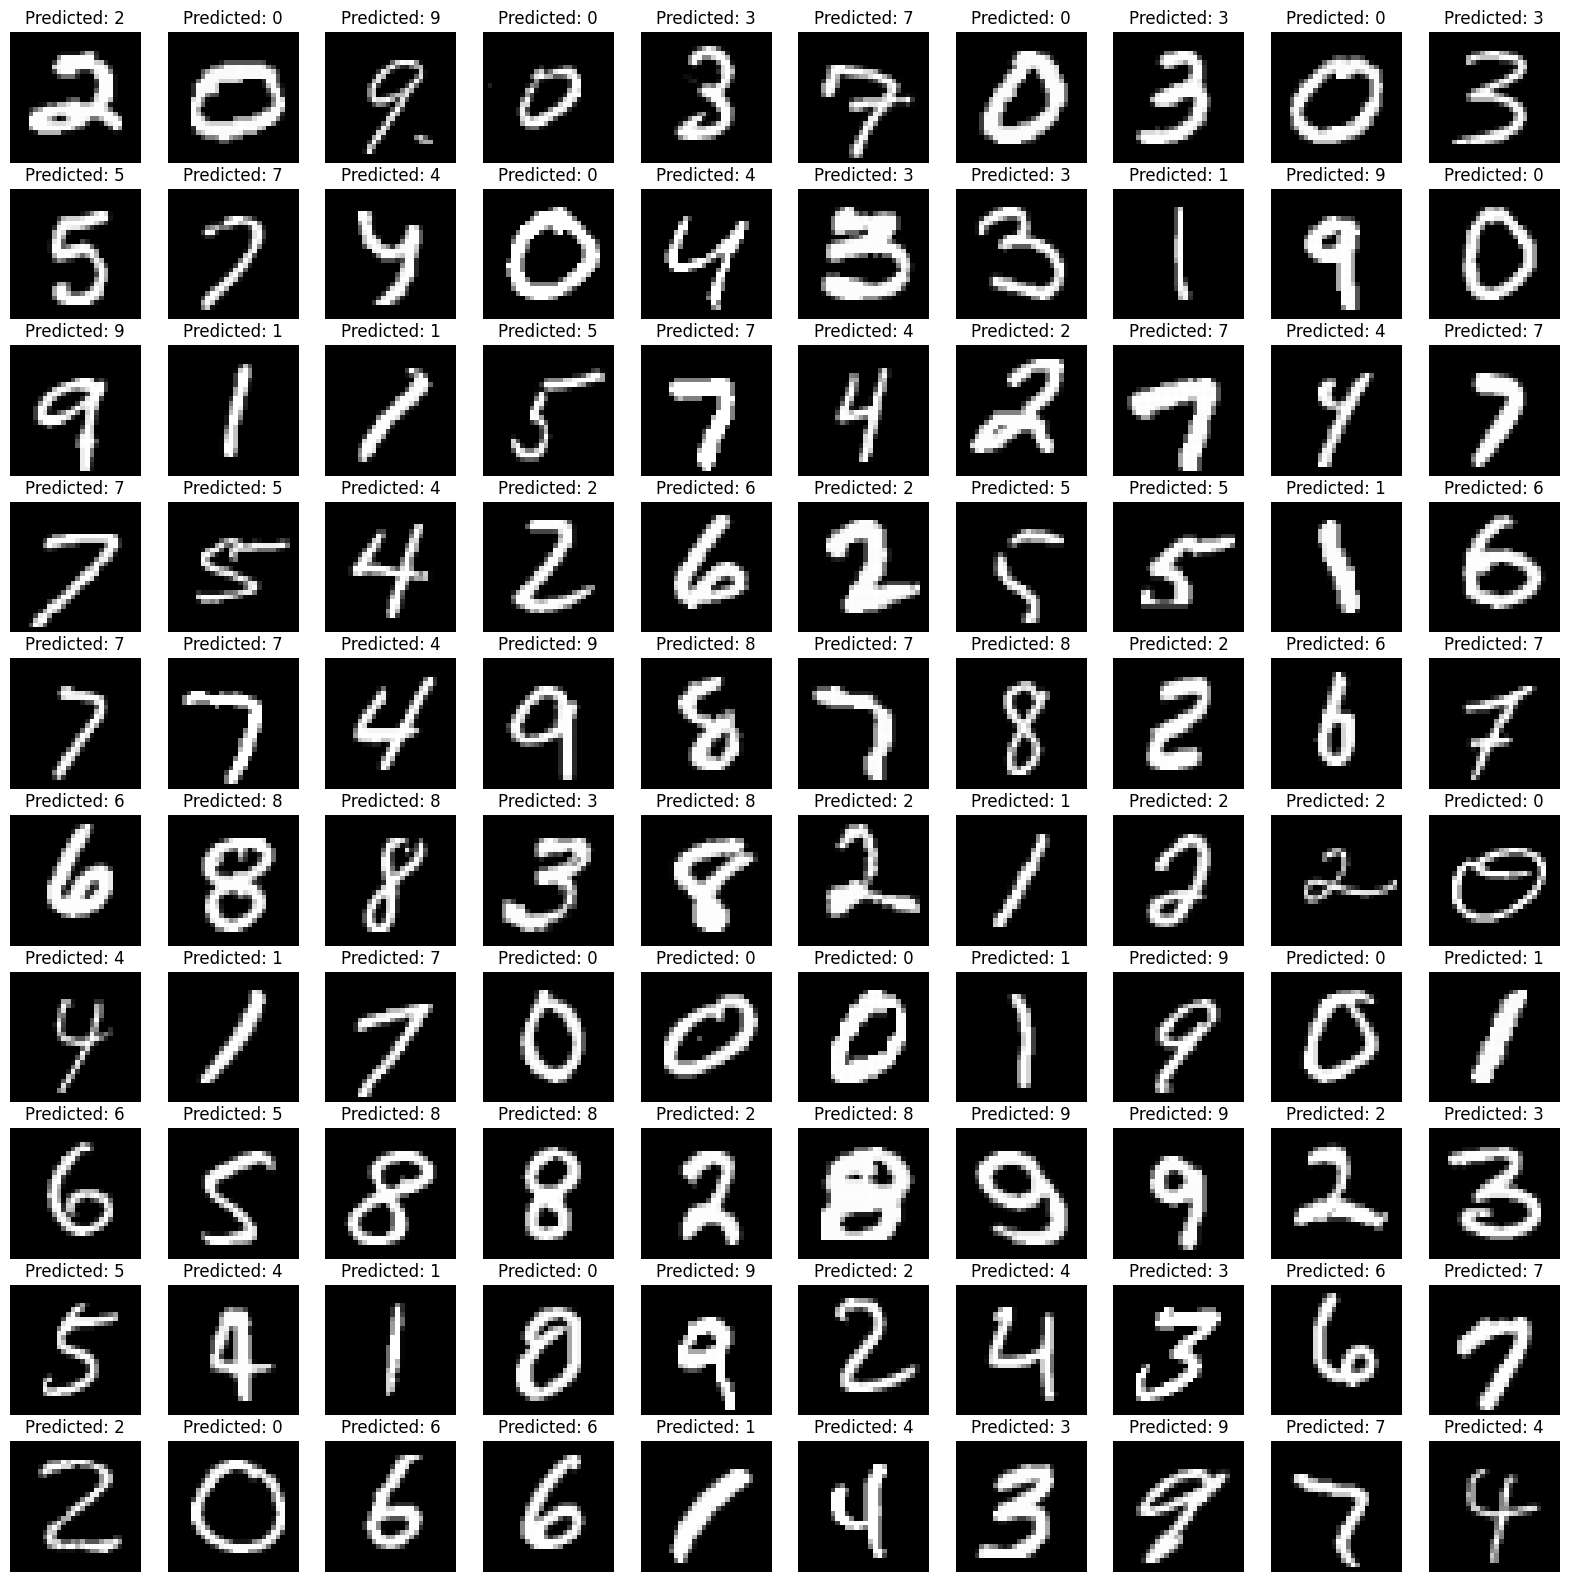

In [37]:
# Make predictions
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

# Show test images along with their predictions
plt.figure(figsize=(20, 20))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"Predicted: {y_pred[i]}")
    plt.axis("off")
plt.show()